<a href="https://colab.research.google.com/github/salvares/desafios/blob/master/visualizacao_da_informacao_maio_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Trabalho de visualização da informação
#link do vídeo de apresentação: https://www.loom.com/share/7044ffbe88e6401086785badfb5a8758
#Sérgio Álvares de Albuquerque RGM 21341729

import numpy as np 
import pandas as pd 

#importação do dataset de imigrantes para o Canadá por país de origem
df_can = pd.read_csv('http://www.sergioalbuquerque.com/cruzeiro/canada.csv',encoding='latin-1', sep=';', error_bad_lines=True)

print('Dados baixados para o dataframe!')



Dados baixados para o dataframe!


In [0]:
#apagando as colunas que irrelevantes para o nosso estudo
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
2,Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
3,American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
#renomeando colunas para nomes mais amigáveis
df_can.rename(columns={'OdName':'Pais', 'AreaName':'Continente','RegName':'Regiao', 'DevName':'Situacao'}, inplace=True)
df_can.head()

,Pais,Continente,Regiao,Situacao,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
2,Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
3,American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
#por consistência, tranformamos todas as colunas em string
df_can.columns = list(map(str, df_can.columns))

#verificando so tipos após a transformação
all(isinstance(column, str) for column in df_can.columns)

True

In [0]:
#definindo o nome do país como índice para facilitar as consultas
df_can.set_index('Pais', inplace=True)

#verificando
df_can.head()

,Continente,Regiao,Situacao,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
#inserindo uma coluna de totalização
df_can['Total'] = df_can.sum(axis=1)

#verificando
df_can.head()

,Continente,Regiao,Situacao,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0


In [0]:
# criando uma lista dos anos de 1980 a 2013
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [0]:
# usando o matplotlib inline para gerar gráficos no browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

# Verificando se a versão do matplotlib está atualizada
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.1


In [0]:
#ordenando por total
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 


df_top5.head()


Pais,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown,Philippines
1980,8880.0,5123.0,22045.0,44000.0,6051.0
1981,8670.0,6682.0,24796.0,18078.0,5921.0
1982,8147.0,3308.0,20620.0,16904.0,5249.0
1983,7338.0,1863.0,10015.0,13635.0,4562.0
1984,5704.0,1527.0,10170.0,14855.0,3801.0


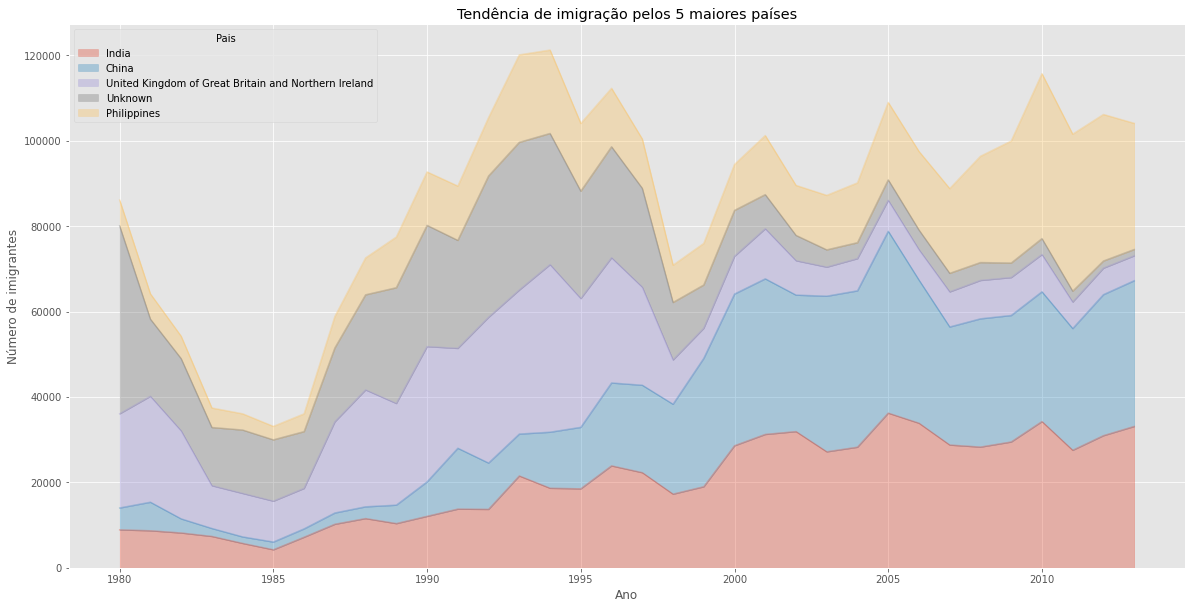

In [0]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', alpha=0.35, 
             figsize=(20, 10))

plt.title('Tendência de imigração pelos 5 maiores países')
plt.ylabel('Número de imigrantes')
plt.xlabel('Ano')

plt.show()

In [0]:
# Criando um dataframe apenas com a China e a Índia, para compará-los
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Pais,China,India
1980,5123.0,8880.0
1981,6682.0,8670.0
1982,3308.0,8147.0
1983,1863.0,7338.0
1984,1527.0,5704.0


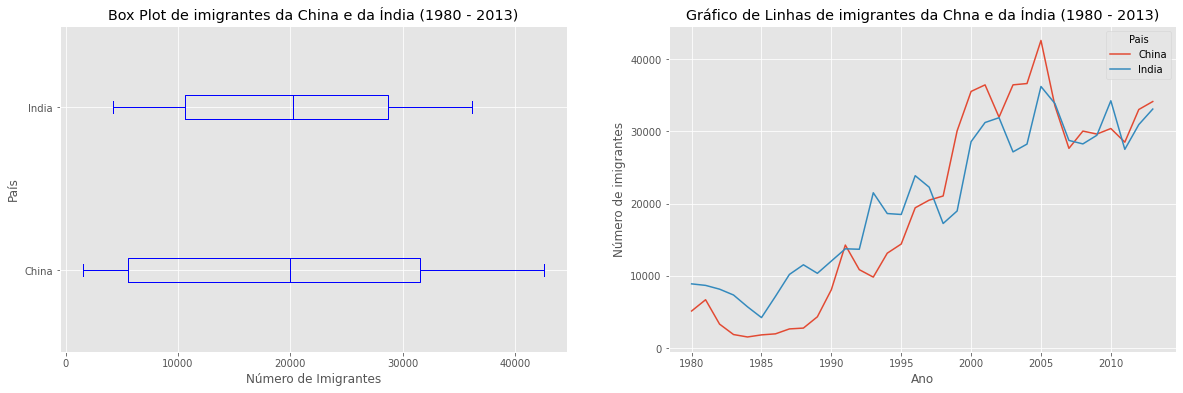

In [0]:
fig = plt.figure() # criando a figura

ax0 = fig.add_subplot(1, 2, 1) # adicionando o subplot 1
ax1 = fig.add_subplot(1, 2, 2) # adicionando o subplot 2

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plot de imigrantes da China e da Índia (1980 - 2013)')
ax0.set_xlabel('Número de Imigrantes')
ax0.set_ylabel('País')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Gráfico de Linhas de imigrantes da Chna e da Índia (1980 - 2013)')
ax1.set_ylabel('Número de imigrantes')
ax1.set_xlabel('Ano')

plt.show()

In [0]:
# totalizando a número de imigrantes por ano
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# mudando o tipo do nome da coluna years para int
df_tot.index = map(int, df_tot.index)

# ressetando o índice
df_tot.reset_index(inplace = True)

# renomeando as colunas
df_tot.columns = ['year', 'total']

# verificando
df_tot.head()

,year,total
0,1980,143137.0
1,1981,128641.0
2,1982,121175.0
3,1983,89185.0
4,1984,88272.0


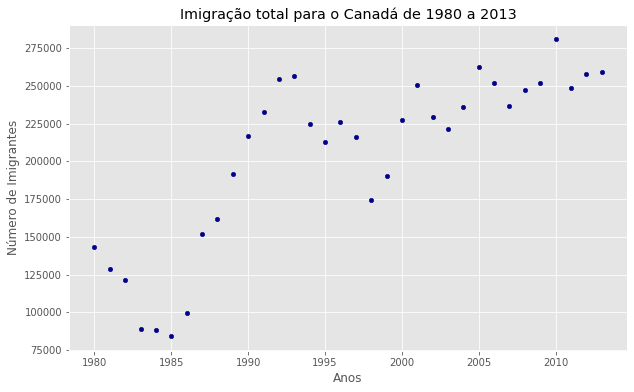

In [0]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Imigração total para o Canadá de 1980 a 2013')
plt.xlabel('Anos')
plt.ylabel('Número de Imigrantes')

plt.show()